C:\Users\rc940\AppData\Local\Temp\ipykernel_22512\3266736284.py:4: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Trial_5.csv')


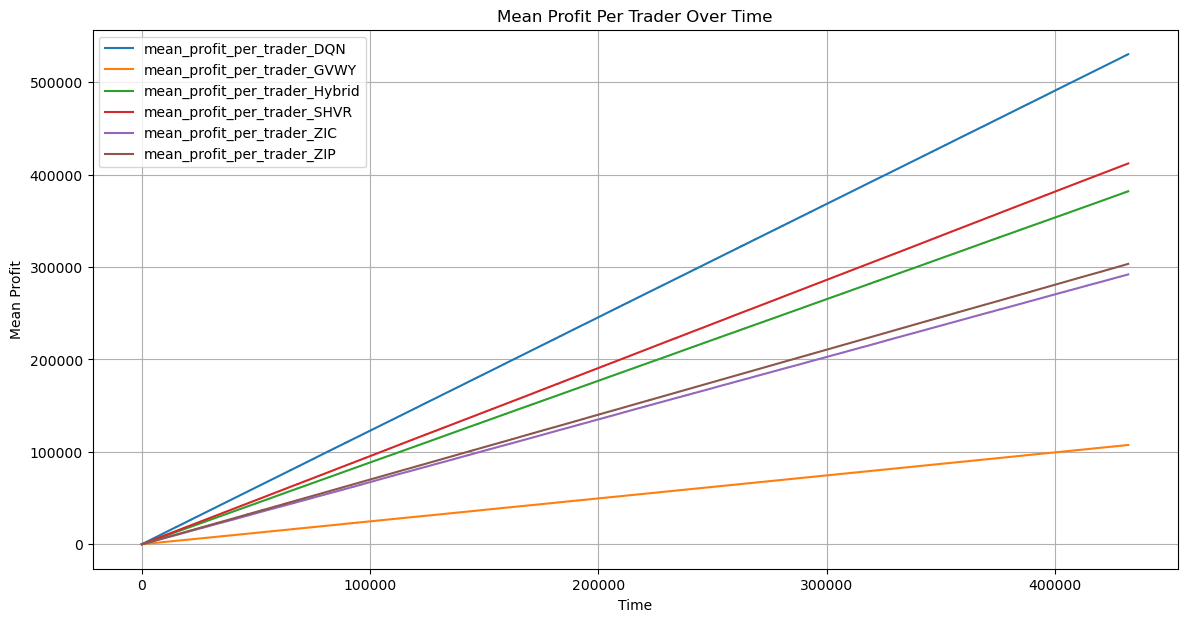

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
data = pd.read_csv('Trial_5.csv')
# Correcting the plotting code using the 'time' column
plt.figure(figsize=(14, 7))
for column in data.columns:
    if 'mean_profit_per_trader' in column:
        plt.plot(data['time'], data[column], label=column)

plt.title('Mean Profit Per Trader Over Time')
plt.xlabel('Time')
plt.ylabel('Mean Profit')
plt.legend()
plt.grid(True)
plt.savefig('Trial_Result',dpi=300, bbox_inches='tight')
plt.show()

C:\Users\rc940\AppData\Local\Temp\ipykernel_22512\3860736841.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Trial_18.csv')


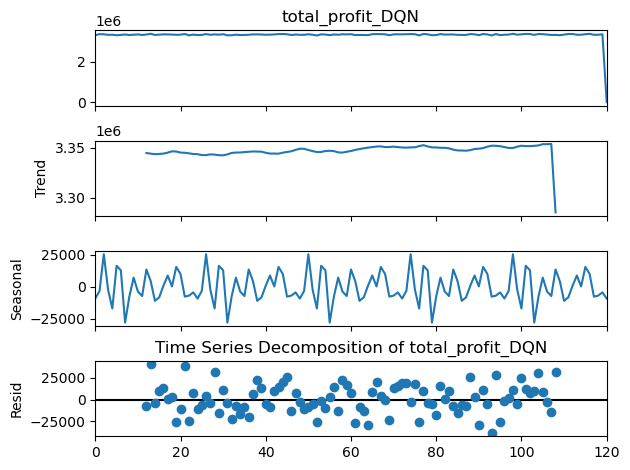

Stats for total_profit_DQN:
Start of Trial: 3344581.520833333
Middle of Trial: 3348358.4942708327
End of Trial: 3348327.0179597703


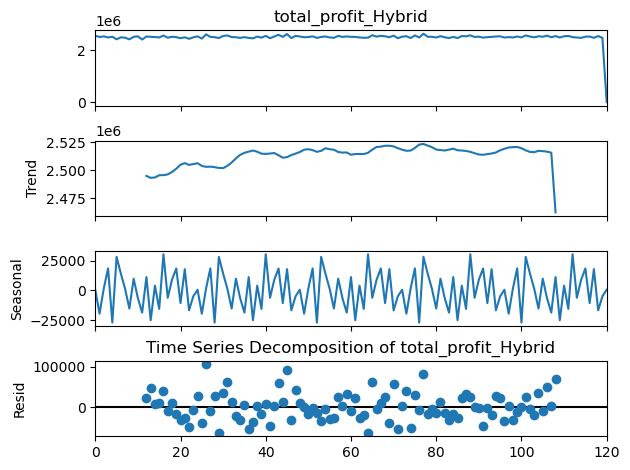

Stats for total_profit_Hybrid:
Start of Trial: 2504740.7046130947
Middle of Trial: 2517543.5947916666
End of Trial: 2515473.2061781604


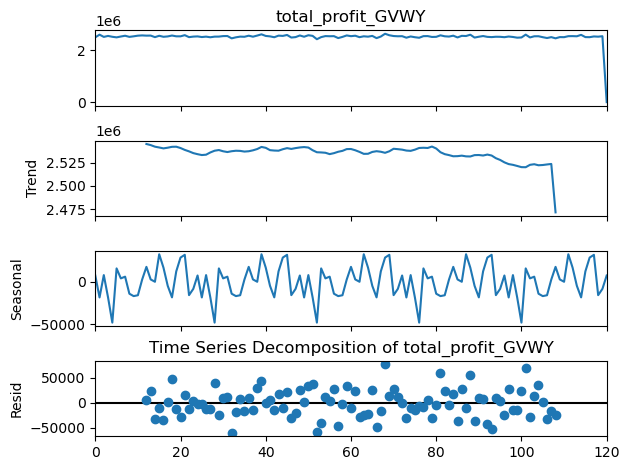

Stats for total_profit_GVWY:
Start of Trial: 2538571.4077380947
Middle of Trial: 2538241.476041666
End of Trial: 2526443.0158045976


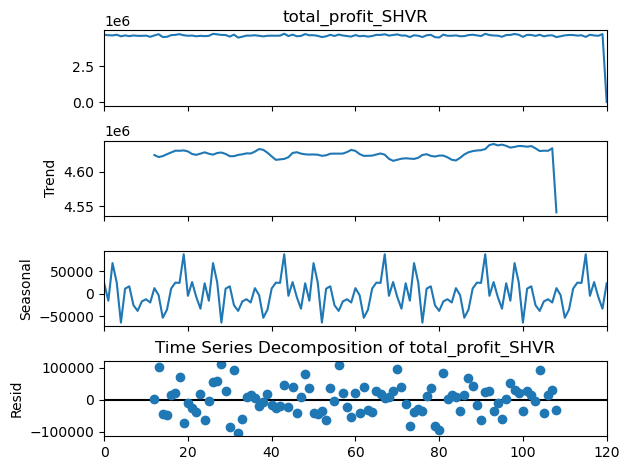

Stats for total_profit_SHVR:
Start of Trial: 4626933.889880952
Middle of Trial: 4623572.648958333
End of Trial: 4628227.88433908


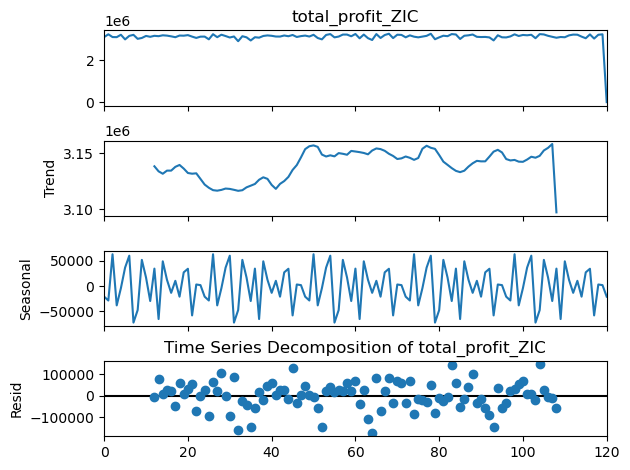

Stats for total_profit_ZIC:
Start of Trial: 3126213.552083333
Middle of Trial: 3146497.0182291665
End of Trial: 3142979.0344827585


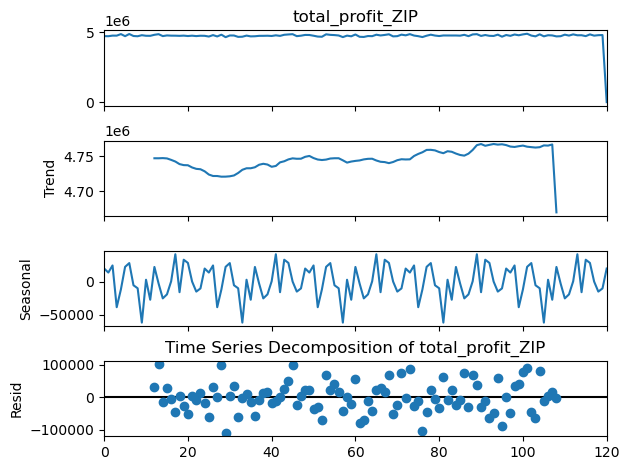

Stats for total_profit_ZIP:
Start of Trial: 4733549.674107143
Middle of Trial: 4746114.524479166
End of Trial: 4758714.635775862


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load your data
df = pd.read_csv('Trial_18.csv')

# Assume 'time' is in seconds and you want to analyze data by hours
df['hour'] = df['time'] // 3600  # Convert seconds to hours

# Before aggregating, drop duplicates for each trader based on 'hour'
# This assumes that duplicates mean exactly repeated 'hour' and 'profit' entries
columns = ['total_profit_DQN', 'total_profit_Hybrid', 'total_profit_GVWY', 'total_profit_SHVR', 'total_profit_ZIC', 'total_profit_ZIP']
for col in columns:
    df[col] = df.groupby('hour')[col].transform('nunique')

# Aggregate unique profits by hour for each trader
aggregated_data = df.groupby('hour').agg({
    'total_profit_DQN': 'sum',
    'total_profit_Hybrid': 'sum',
    'total_profit_GVWY': 'sum',
    'total_profit_SHVR': 'sum',
    'total_profit_ZIC': 'sum',
    'total_profit_ZIP': 'sum'
}).reset_index()

# Set 'hour' as the new index for decomposition
aggregated_data.set_index('hour', inplace=True)

# Decompose and plot for each trader
traders = ['total_profit_DQN', 'total_profit_Hybrid', 'total_profit_GVWY', 'total_profit_SHVR', 'total_profit_ZIC', 'total_profit_ZIP']  # Update this list based on your traders
for trader in traders:
    result = seasonal_decompose(aggregated_data[trader], model='additive', period=24)  # Adjust period based on data frequency
    fig = result.plot()
    plt.title(f'Time Series Decomposition of {trader}')
    plt.savefig(f'{trader}_decomposition.png')  # Save the decomposition plots
    plt.show()

    # Display stats for analysis
    print(f"Stats for {trader}:")
    print("Start of Trial:", result.trend.iloc[:int(len(result.trend)/3)].mean())
    print("Middle of Trial:", result.trend.iloc[int(len(result.trend)/3):int(2*len(result.trend)/3)].mean())
    print("End of Trial:", result.trend.iloc[int(2*len(result.trend)/3):].mean())

C:\Users\rc940\AppData\Local\Temp\ipykernel_22512\2659280753.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Trial_17.csv')


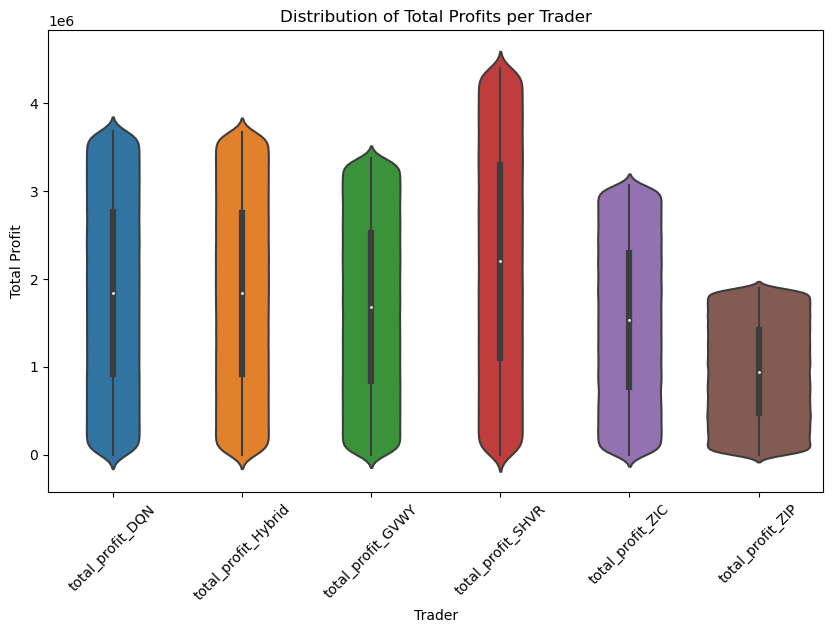

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Trial_17.csv')

# Creating a DataFrame suitable for seaborn's violin plot
profit_data = df[['total_profit_DQN', 'total_profit_Hybrid', 'total_profit_GVWY', 'total_profit_SHVR', 'total_profit_ZIC', 'total_profit_ZIP']]

# Melting the DataFrame to long format which seaborn can use for plotting
profit_long = pd.melt(profit_data, var_name='Trader', value_name='Total Profit')

# Plotting the violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Trader', y='Total Profit', data=profit_long)
plt.title('Distribution of Total Profits per Trader')
plt.xticks(rotation=45)  # Rotating trader names for better readability
plt.savefig('Violin_plot',dpi=300, bbox_inches='tight')
plt.show()